In [168]:
import pandas as pd, matplotlib.pyplot as plt, seaborn, sklearn, numpy as np

In [169]:
train_set=pd.read_csv('train.csv')

In [170]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [172]:
train_set.drop(['Ticket', 'Fare','Cabin','Embarked', 'PassengerId', 'Name'], inplace=True, axis=1)

In [173]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [174]:
X_train_set, y_train_set=train_set[['Pclass','Sex','Age','SibSp','Parch']], train_set['Survived']

In [175]:
X_train_set.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [176]:
y_train_set.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [177]:
X_train_set['Sex']=X_train_set['Sex'].replace(to_replace=['female','male'], value=[1,0])
X_train_set.head()

C:\Users\gost_\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [178]:
X_train_set['Age'].max()

80.0

In [179]:
X_train_set['Age'].min()

0.41999999999999998

In [180]:
X_train_set['Age'].mean()

29.69911764705882

In [181]:
X_train_set['Age'].fillna(30.,inplace=True)

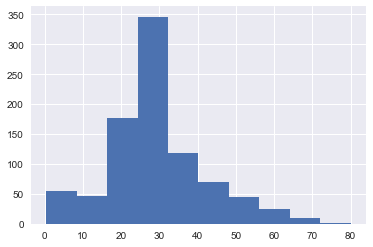

In [182]:
%matplotlib inline
X_train_set['Age'].hist()

In [159]:
X_train_set[X_train_set.Age==100]

,Pclass,Sex,Age,SibSp,Parch
5,3,0,100.0,0,0
17,2,0,100.0,0,0
19,3,1,100.0,0,0
26,3,0,100.0,0,0
28,3,1,100.0,0,0
29,3,0,100.0,0,0
31,1,1,100.0,1,0
32,3,1,100.0,0,0
36,3,0,100.0,0,0
42,3,0,100.0,0,0


In [157]:
train_set['Age'].fillna(100.,inplace=True)
train_set[train_set.Age==100]

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,100.0,0,0
17,1,2,male,100.0,0,0
19,1,3,female,100.0,0,0
26,0,3,male,100.0,0,0
28,1,3,female,100.0,0,0
29,0,3,male,100.0,0,0
31,1,1,female,100.0,1,0
32,1,3,female,100.0,0,0
36,1,3,male,100.0,0,0
42,0,3,male,100.0,0,0


In [164]:
X_train_set['Age'].fillna(30.,inplace=True)

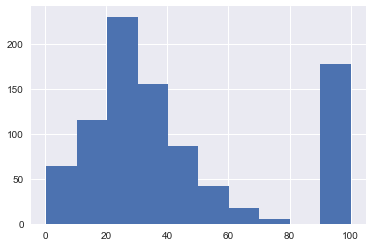

In [165]:
%matplotlib inline
X_train_set['Age'].hist()